## Libraries and Prerequisites

In [106]:
import pandas as pd
import numpy as np

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [108]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [109]:
from sklearn.preprocessing import MinMaxScaler

## Understanding the Data

In [133]:
# Reading the Dataset/CSV File
df = pd.read_csv('Apple_Stocks_Data.csv')

In [134]:
df.head()                                                                                                              #Head Method 

,Date,Close/Last,Volume,Open,High,Low
0,05/21/2021,$125.43,79295440,$127.82,$128,$125.21
1,05/20/2021,$127.31,76857120,$125.23,$127.72,$125.1
2,05/19/2021,$124.69,92611990,$123.16,$124.915,$122.86
3,05/18/2021,$124.85,63342930,$126.56,$126.99,$124.78
4,05/17/2021,$126.27,74116550,$126.82,$126.93,$125.17


In [135]:
df.tail()                                                                                                               #Tail Method 

,Date,Close/Last,Volume,Open,High,Low
2512,05/27/2011,$12.0504,203529707,$11.9571,$12.0582,$11.9396
2513,05/26/2011,$11.9643,222494799,$11.9989,$12.0318,$11.9441
2514,05/25/2011,$12.0279,293749563,$11.9082,$12.0914,$11.8875
2515,05/24/2011,$11.8639,321779511,$11.9821,$11.9964,$11.8336
2516,05/23/2011,$11.9429,382164007,$11.7846,$11.9993,$11.765


## Data Manipulation

#### SUB SETTINGS

In [136]:
df = df[['Date', 'Close/Last']]

In [137]:
df.head()

,Date,Close/Last
0,05/21/2021,$125.43
1,05/20/2021,$127.31
2,05/19/2021,$124.69
3,05/18/2021,$124.85
4,05/17/2021,$126.27


In [138]:
df.dtypes

Date          object
Close/Last    object
dtype: object

In [139]:
df = df.replace({'\$':""},regex=True)

In [140]:
df = df.astype({"Close/Last": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date          datetime64[ns]
Close/Last           float64
dtype: object

In [141]:
df.head()

,Date,Close/Last
0,2021-05-21,125.43
1,2021-05-20,127.31
2,2021-05-19,124.69
3,2021-05-18,124.85
4,2021-05-17,126.27


In [142]:
df.index = df['Date']

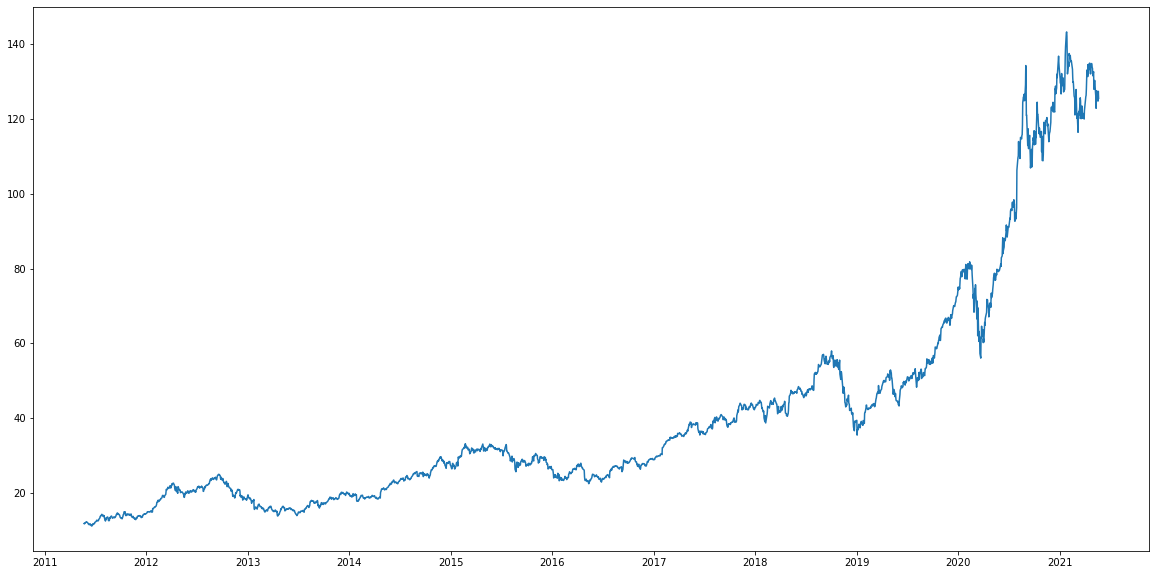

In [143]:
plt.plot(df["Close/Last"],label='Close Price history')

# LSTM Prediction Model

### Data Preparation

In [144]:
df = df.sort_index(ascending=True,axis=0)

In [145]:
data = pd.DataFrame(index = range(0,len(df)), columns = ['Date','Close'])

In [146]:
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close"][i]=df["Close/Last"][i]

In [147]:
data.head()

,Date,Close
0,2011-05-23 00:00:00,11.9429
1,2011-05-24 00:00:00,11.8639
2,2011-05-25 00:00:00,12.0279
3,2011-05-26 00:00:00,11.9643
4,2011-05-27 00:00:00,12.0504


### Scaling

In [148]:
scaler=MinMaxScaler(feature_range=(0,1))

In [149]:
data.index=data.Date
data.drop("Date",axis=1,inplace=True)

In [150]:
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]

In [151]:
scaler=MinMaxScaler(feature_range=(0,1))

In [152]:
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

### Defining a Model

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model

In [131]:
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

### Train and Test Data

In [ ]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

In [ ]:
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

### Prediction Function

In [ ]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

### Prediction Result

In [ ]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])